<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Time_Series_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fbprophet import Prophet
import pandas as pd

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/page_wikipedia.csv')
data.head()

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


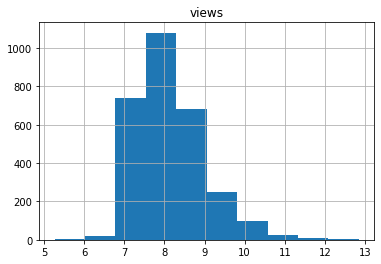

In [4]:
data.hist();

In [5]:
data.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [11]:
# when we work prophet, we need change index name
data.columns = ['ds', 'y']
data.columns

Index(['ds', 'y'], dtype='object')

In [12]:
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [13]:
data = data.sort_values(by='ds')
data

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


# Predictions

In [14]:
model = Prophet().fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(periods=90)

In [16]:
forecast = model.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.038509,8.227866,9.475348,8.038509,8.038509,0.803012,0.803012,0.803012,0.352283,0.352283,0.352283,0.450729,0.450729,0.450729,0.0,0.0,0.0,8.841521
1,2007-12-11,8.036976,7.921536,9.163188,8.036976,8.036976,0.553114,0.553114,0.553114,0.119631,0.119631,0.119631,0.433483,0.433483,0.433483,0.0,0.0,0.0,8.590090
2,2007-12-12,8.035443,7.761803,9.012911,8.035443,8.035443,0.350515,0.350515,0.350515,-0.066656,-0.066656,-0.066656,0.417171,0.417171,0.417171,0.0,0.0,0.0,8.385958
3,2007-12-13,8.033910,7.752634,9.014787,8.033910,8.033910,0.329968,0.329968,0.329968,-0.072272,-0.072272,-0.072272,0.402239,0.402239,0.402239,0.0,0.0,0.0,8.363878
4,2007-12-14,8.032377,7.725567,8.973544,8.032377,8.032377,0.319515,0.319515,0.319515,-0.069577,-0.069577,-0.069577,0.389092,0.389092,0.389092,0.0,0.0,0.0,8.351892


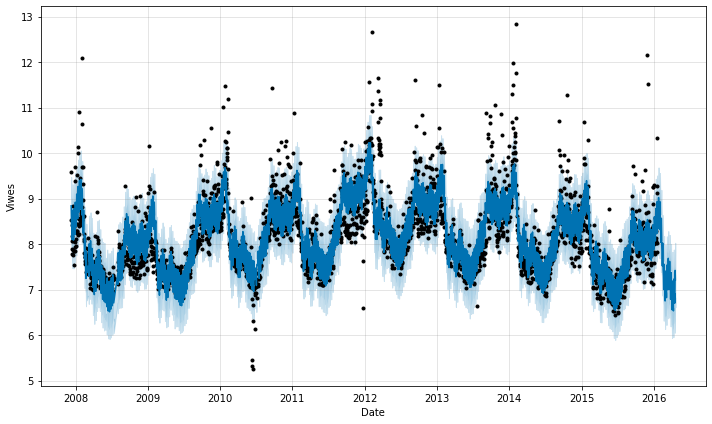

In [18]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Viwes');

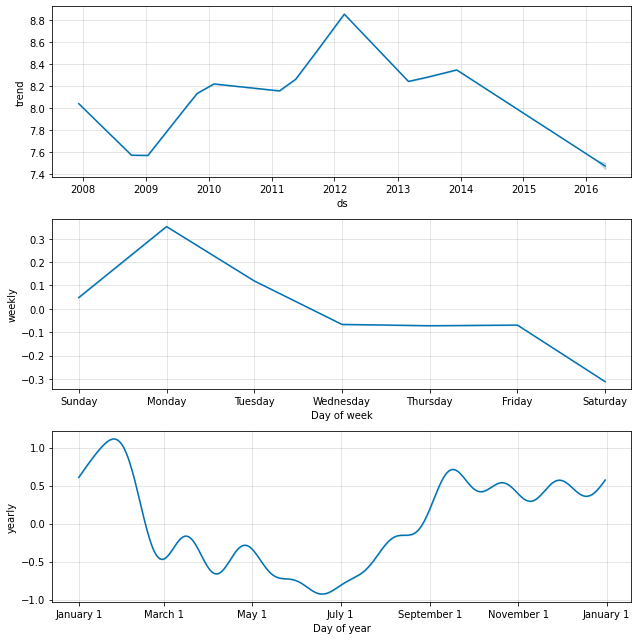

In [19]:
model.plot_components(forecast);

In [20]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [21]:
plot_components_plotly(model, forecast)